# Aufgabe 1.1. Daten runterladen

In [35]:
import urllib.request
url = "https://data.sfgov.org/api/views/qzz6-2jup/rows.csv?accessType=DOWNLOAD"
checkout_file = "../data/Library_Usage.csv"
urllib.request.urlretrieve(url, checkout_file)

('../data/Library_Usage.csv', <http.client.HTTPMessage at 0x27b77108d60>)

# Beispiel Numpy

In [2]:
# import the library and give it a shorter name 'np'
import numpy as np

# create 100 randomly distributed numbers
X = np.random.normal(size=100)

# transform X into a 2-dimensional array of size 20x5
X.reshape((20, 5))

# calculate the matrix dot product: X*X', where X' is the transpose of X
X.dot(X.T)


111.94900661175355

# Beispiel Pandas

In [3]:
# import the library and give it a shorter name 'pd'
import pandas as pd

# create a dataframe by hand with two columns and three rows
df = pd.DataFrame({
        'month': [1, 2, 3],
        'temperatur': [-12, 3, 9]
})

# print out some descriptive statistics
df.describe()


,month,temperatur
count,3.0,3.000000
mean,2.0,0.000000
std,1.0,10.816654
min,1.0,-12.000000
25%,1.5,-4.500000
50%,2.0,3.000000
75%,2.5,6.000000
max,3.0,9.000000


# Bsp. Matplotlib

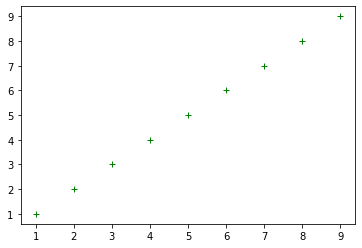

In [4]:
# import the package and give it the shorter name 'plt'
%matplotlib inline
import matplotlib.pyplot as plt

# create some dummy data
x = range(1, 10)

# make a simple scatter plot of the data
plt.plot(x, x, c="green", linestyle='', marker='+')


# Aufgabe 1.6. matplotlib

Ändere die Farbe der Pukte im Plot von grün auf schwarz.  

> c="black"

Ändere den Aufruf so um, dass statt Punkte, Linien angezeigt werden

> linestyle='dashed"

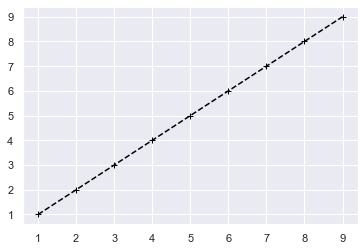

In [7]:
x = range(1, 10)

# make a simple scatter plot of the data
plt.plot(x, x, c="black", linestyle='dashed', marker='+')

# Bsp. Seaborn

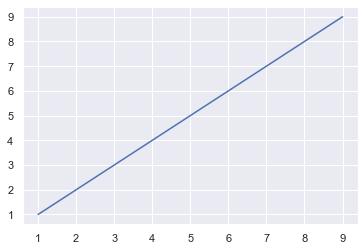

In [6]:
# import the libraries and give them some shorter names
import matplotlib.pyplot as plt
import seaborn as sns

# setup the seaborn library
sns.set()

# create the same plot as in the previous example
x = range(1, 10)
plt.plot(x, x)


# Bsp Scipy

In [8]:
# import the package stats from the library scipy
from scipy import stats

# create two numerical arrays
x = [12, 10, 11, 13, 14, 10, 13, 13, 22]
y = [1, 4, 2, 3, 5, 2, 1, 0, 0, 1, 2]

# perform a two sample t-test, to test if the samples have different means
stats.ttest_ind(x,y)

Ttest_indResult(statistic=9.281138146360542, pvalue=2.7794419042727725e-08)

# Bsp. Scitkit-Learn

In [9]:
# import the packages
import numpy as np
from sklearn.linear_model import LinearRegression

# create some dummy dependent and independent variable
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = - 1 * X[:,0] + 2 * X[:,1]

# estimate a linear regression and print out the coefficients
reg = LinearRegression().fit(X, y)
reg.coef_

array([-1.,  2.])

# Aufgabe 2.1 Grundbegriffe

## 1.    Wie viele Merkmale besitzt der Datensatz?  
## 2.    Wie groß ist die Stichprobengröße des Datensatzes?

In [32]:
import pandas as pd 
df = pd.read_csv("../data/Library_Usage.csv")
df.shape

(423448, 15)

## 3.    Wer oder was sind die Merkmalsträger?

In [33]:
df.columns


Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [34]:
df.dtypes # Hier kriege ich die Spalten und Informationen zum Content

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [49]:
len(df)

423448

## 4.    Von wann bis wann wurden die Daten erhoben?

In [37]:
df['Circulation Active Year'].unique()

array(['None', '2016', '2014', '2015', '2012', '2013', '2011', '2009',
       '2010', '2007', '2006', '2008', '2005', '2004', '2003'],
      dtype=object)

In [46]:
df[df['Circulation Active Year'] == "2016"][["Circulation Active Month", "Circulation Active Year"]].groupby("Circulation Active Month").sum()

#Neueste Daten vom Juli 2016

,Circulation Active Year
Circulation Active Month,
April,2016201620162016201620162016201620162016201620...
February,2016201620162016201620162016201620162016201620...
January,2016201620162016201620162016201620162016201620...
July,2016201620162016201620162016201620162016201620...
June,2016201620162016201620162016201620162016201620...
March,2016201620162016201620162016201620162016201620...
May,2016201620162016201620162016201620162016201620...


In [47]:
df[df['Circulation Active Year'] == "2003"][["Circulation Active Month", "Circulation Active Year"]].groupby("Circulation Active Month").sum()

# 2003 nur Daten vom Dezember

,Circulation Active Year
Circulation Active Month,
December,200320032003200320032003


## 5.    Wie lässt sich die Grundgesamtheit beschreiben? Handelt es sich um eine Vollerhebung?

Grundgesamtheit sind alle Ausleiher der SFL, da es durch das BIbliothekssystem erstellte Zahlen sind, kann ich vermuten, dass es eine Vollerhebung ist.  

## 6.    Welche Merkmale sind stetig? Welche diskret?

Stetig sind nur:
 Total Checkouts                   int64
 Total Renewals                    int64


## 7.    Welchem Skalenniveau entsprechen die einzelnen Merkmale (Nominal-, Ordinal- oder Metrische Skala)?

Metrisch:  
 Total Checkouts                   int64
 Total Renewals                    int64
 Circulation Active Year          object
 Year Patron Registered            int64

Ordinal:  
 Age Range                        object

Nominal:  
 der Rest ...

 ## 8.    Enthält der Datensatz fehlende Werte?

In [51]:
df.isna().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

## 9.    Handelt es sich um Querschnitts-, Längsschnitss- oder Paneldaten?

Querschnitt

# Aufgabe 2.2. Skalenniveau und Datentyp

In [27]:
import pandas as pd
data = {'month': ['Jan', 'Feb', 'Mar'],
        'temp': [-5, 2, 3],
         'below_zero': [True, False, False]}
df = pd.DataFrame(data)
print(df)

  month  temp  below_zero
0   Jan    -5        True
1   Feb     2       False
2   Mar     3       False


## Welches Skalenniveau besitzen die Variablen im obigen Beispiel?

Month = Nominal  
Temp = Intervall  
Below_zero = Nominal

## Sind die Variablen stetig oder diskret?

Month = diskret  
Temp = stetig  
Below_zero = diskret

## Was ist der Datentyp jeder einzelnen Spalte?

In [14]:
df.dtypes

month         object
temp           int64
below_zero      bool
dtype: object

## Erweitere das Python-Dictionary und

- erstelle eine neue Zeile mit den Werten ('Apr', 5, False)
- erstelle eine neue Spalte year mit den Werten (2020, 2020, 2020, 2020)

In [28]:
add = ['Apr', 5, False]

#append geht nicht, weil meine Daten keinen Index haben
# df.append(data, ignore_index=True, sort=True)

df.loc[len(df.index)]=add
# Loc fügt bei Labels oder array an
df

,month,temp,below_zero
0,Jan,-5,True
1,Feb,2,False
2,Mar,3,False
3,Apr,5,False


In [30]:
year = [2020, 2020, 2020, 2020]

df.assign(Year=year)  
# neue Spalte anhängen, in Klammer Definition des Spaltentitels und Inhalt)

,month,temp,below_zero,Year
0,Jan,-5,True,2020
1,Feb,2,False,2020
2,Mar,3,False,2020
3,Apr,5,False,2020


## Back to Library Usage Data

In [43]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")


# Exkurs: Datenrundreise 

In [44]:
import pandas as pd
df_small = pd.read_csv("../data/Library_Usage_Small.csv")

In [46]:
# schreibe es in Json-Datei
df_small.to_json("../data/Library_Usage_Small.json")


In [47]:
df_small = pd.read_json("../data/Library_Usage_Small.json")
df_small

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,1,JUVENILE,518,8,10 to 19 years,V3,Visitacion Valley,July,2016,p,phone,False,2010,False,10.0
1,1,JUVENILE,38,0,0 to 9 years,P1,Park,June,2016,z,email,True,2015,False,4.0
2,0,ADULT,38,4,10 to 19 years,N4,Noe Valley/Sally Brunn,November,2008,z,email,True,2003,False,8.0
3,0,ADULT,48,48,20 to 24 years,O7,Ortega,February,2013,p,phone,False,2004,False,10.0
4,1,JUVENILE,28,13,0 to 9 years,E9,Excelsior,June,2016,z,email,True,2014,False,11.0
5,1,JUVENILE,1,0,10 to 19 years,M4,Merced,May,2016,z,email,True,2016,False,11.0
6,1,JUVENILE,293,11,0 to 9 years,M6,Mission,June,2016,z,email,True,2014,False,8.0
7,1,JUVENILE,900,6,0 to 9 years,V3,Visitacion Valley,June,2016,a,print,False,2011,False,10.0
8,1,JUVENILE,1569,801,10 to 19 years,W4,Western Addition,July,2016,z,email,True,2009,False,8.0
9,1,JUVENILE,45,0,0 to 9 years,A5,Anza,June,2016,z,email,True,2015,False,1.0


In [48]:
df_small.to_html("../data/Library_Usage_Small.html")

In [49]:
dt_small = pd.read_html("../data/Library_Usage_Small.html")

In [50]:
df_small

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,1,JUVENILE,518,8,10 to 19 years,V3,Visitacion Valley,July,2016,p,phone,False,2010,False,10.0
1,1,JUVENILE,38,0,0 to 9 years,P1,Park,June,2016,z,email,True,2015,False,4.0
2,0,ADULT,38,4,10 to 19 years,N4,Noe Valley/Sally Brunn,November,2008,z,email,True,2003,False,8.0
3,0,ADULT,48,48,20 to 24 years,O7,Ortega,February,2013,p,phone,False,2004,False,10.0
4,1,JUVENILE,28,13,0 to 9 years,E9,Excelsior,June,2016,z,email,True,2014,False,11.0
5,1,JUVENILE,1,0,10 to 19 years,M4,Merced,May,2016,z,email,True,2016,False,11.0
6,1,JUVENILE,293,11,0 to 9 years,M6,Mission,June,2016,z,email,True,2014,False,8.0
7,1,JUVENILE,900,6,0 to 9 years,V3,Visitacion Valley,June,2016,a,print,False,2011,False,10.0
8,1,JUVENILE,1569,801,10 to 19 years,W4,Western Addition,July,2016,z,email,True,2009,False,8.0
9,1,JUVENILE,45,0,0 to 9 years,A5,Anza,June,2016,z,email,True,2015,False,1.0


In [56]:
writer = ('../data/Library_Usage_Small.xlsx')

df_small.to_excel(writer, index = False)
# okay, das war beim ersten Durchlauf komplett anders ... 

In [58]:
df_small = pd.read_excel('../data/Library_Usage_Small.xlsx', engine='openpyxl')
df_small

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,1,JUVENILE,518,8,10 to 19 years,V3,Visitacion Valley,July,2016,p,phone,False,2010,False,10.0
1,1,JUVENILE,38,0,0 to 9 years,P1,Park,June,2016,z,email,True,2015,False,4.0
2,0,ADULT,38,4,10 to 19 years,N4,Noe Valley/Sally Brunn,November,2008,z,email,True,2003,False,8.0
3,0,ADULT,48,48,20 to 24 years,O7,Ortega,February,2013,p,phone,False,2004,False,10.0
4,1,JUVENILE,28,13,0 to 9 years,E9,Excelsior,June,2016,z,email,True,2014,False,11.0
5,1,JUVENILE,1,0,10 to 19 years,M4,Merced,May,2016,z,email,True,2016,False,11.0
6,1,JUVENILE,293,11,0 to 9 years,M6,Mission,June,2016,z,email,True,2014,False,8.0
7,1,JUVENILE,900,6,0 to 9 years,V3,Visitacion Valley,June,2016,a,print,False,2011,False,10.0
8,1,JUVENILE,1569,801,10 to 19 years,W4,Western Addition,July,2016,z,email,True,2009,False,8.0
9,1,JUVENILE,45,0,0 to 9 years,A5,Anza,June,2016,z,email,True,2015,False,1.0


In [60]:
df_small.to_csv('../data/Library_Usage_Small_new.csv')

In [62]:
df_final = pd.read_csv('../data/Library_Usage_Small_new.csv')

In [63]:
df_final
# über Excel wird eine Spalte vorne mit der Zeilenzählung angehängt, wichtig, wenn ich Formate ändere und den Code ablege mit ggf. gezieltem Ansteuern von Spalten über Position

,Unnamed: 0,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,1,JUVENILE,518,8,10 to 19 years,V3,Visitacion Valley,July,2016,p,phone,False,2010,False,10.0
1,1,1,JUVENILE,38,0,0 to 9 years,P1,Park,June,2016,z,email,True,2015,False,4.0
2,2,0,ADULT,38,4,10 to 19 years,N4,Noe Valley/Sally Brunn,November,2008,z,email,True,2003,False,8.0
3,3,0,ADULT,48,48,20 to 24 years,O7,Ortega,February,2013,p,phone,False,2004,False,10.0
4,4,1,JUVENILE,28,13,0 to 9 years,E9,Excelsior,June,2016,z,email,True,2014,False,11.0
5,5,1,JUVENILE,1,0,10 to 19 years,M4,Merced,May,2016,z,email,True,2016,False,11.0
6,6,1,JUVENILE,293,11,0 to 9 years,M6,Mission,June,2016,z,email,True,2014,False,8.0
7,7,1,JUVENILE,900,6,0 to 9 years,V3,Visitacion Valley,June,2016,a,print,False,2011,False,10.0
8,8,1,JUVENILE,1569,801,10 to 19 years,W4,Western Addition,July,2016,z,email,True,2009,False,8.0
9,9,1,JUVENILE,45,0,0 to 9 years,A5,Anza,June,2016,z,email,True,2015,False,1.0


## Exkurs Ende ...

# Arbeit mit Spalten

In [65]:
x = df['Total Renewals']
df[['Total Renewals', 'Total Checkouts']]
column_names = ['Total Renewals', 'Total Checkouts'] # auxiliary variable
subset = df[column_names]
print(x)
print(subset)

0          0
1         22
2          0
3          0
4         11
          ..
423443    13
423444    11
423445    58
423446     0
423447     0
Name: Total Renewals, Length: 423448, dtype: int64
        Total Renewals  Total Checkouts
0                    0                0
1                   22               31
2                    0                0
3                    0                0
4                   11              126
...                ...              ...
423443              13              291
423444              11               15
423445              58              208
423446               0               26
423447               0                0

[423448 rows x 2 columns]


In [66]:
df['dummy_variable'] = 5

In [68]:
df['dummy_variable']

0         5
1         5
2         5
3         5
4         5
         ..
423443    5
423444    5
423445    5
423446    5
423447    5
Name: dummy_variable, Length: 423448, dtype: int64

In [69]:
import numpy as np

df['is_adult'] = df['Patron Type Definition'] == 'ADULT'
df['log_renewals'] = np.log(df['Total Renewals'] + 1)  
# Veränderung wird direkt in neue Spalte geschrieben

# Fallstudie 2.5 Feature Engineering

Neue Variable Membership Duration zu erstellen

Die "Formel" dafür 

>'Membership Duration' = ('Circulation Active Year' - 'Year Patron Registered')*12 + 'Circulation Active Month'

[Ich rechne das jetzt so, obwohl ich persönlich die Addition der Monate nicht machen würde, weil es m.E. das Ergebnis ungenau macht, da ich vom "Registrierungsjahr" keine Monatsangabe habe]

In [6]:
a = pd.to_numeric(df['Circulation Active Year'], errors='coerce')

# das Verändert mir die Angaben in dieser Spalten zu Zahlen, damit ich rechnen kann 
# funktioniert nur, wenn ich es in neue Variable schreibe
a

0            NaN
1         2016.0
2            NaN
3            NaN
4         2016.0
           ...  
423443    2015.0
423444    2016.0
423445    2016.0
423446    2015.0
423447       NaN
Name: Circulation Active Year, Length: 423448, dtype: float64

In [7]:
c_series = pd.to_datetime(
    df['Circulation Active Month'],
    errors='coerce',
    format="%B"
)

c = c_series.dt.month
#df['Circulation Active Month']
c

0         NaN
1         4.0
2         NaN
3         NaN
4         1.0
         ... 
423443    3.0
423444    7.0
423445    7.0
423446    4.0
423447    NaN
Name: Circulation Active Month, Length: 423448, dtype: float64

In [8]:
b = df['Year Patron Registered']
b

0         2014
1         2010
2         2016
3         2015
4         2003
          ... 
423443    2009
423444    2016
423445    2014
423446    2003
423447    2015
Name: Year Patron Registered, Length: 423448, dtype: int64

In [9]:
df['Membership Duration'] = ((a - b)*12 + c)

In [10]:
df['Membership Duration']

0           NaN
1          76.0
2           NaN
3           NaN
4         157.0
          ...  
423443     75.0
423444      7.0
423445     31.0
423446    148.0
423447      NaN
Name: Membership Duration, Length: 423448, dtype: float64

In [11]:
df['Membership Duration'].fillna(0)
# ersetzt die NaN-Werte durch 0

0           0.0
1          76.0
2           0.0
3           0.0
4         157.0
          ...  
423443     75.0
423444      7.0
423445     31.0
423446    148.0
423447      0.0
Name: Membership Duration, Length: 423448, dtype: float64

# Auswahl von Zeilen

In [1]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df.loc[df['Total Checkouts'] > 10000]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
851,9,SPECIAL,18064,2268,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,NaN
1963,0,ADULT,10521,621,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,6.0
3499,0,ADULT,12740,2209,45 to 54 years,C2,Chinatown,July,2016,z,email,True,2003,False,3.0
20042,3,SENIOR,16060,66,65 to 74 years,C2,Chinatown,July,2016,a,print,False,2003,False,3.0
31315,0,ADULT,13784,74,60 to 64 years,M4,Merced,June,2016,z,email,True,2003,False,11.0
39585,0,ADULT,11086,1083,35 to 44 years,C2,Chinatown,July,2016,p,phone,False,2003,False,3.0
57239,0,ADULT,10906,1421,45 to 54 years,P1,Park,July,2016,z,email,True,2003,False,8.0
86662,3,SENIOR,11748,963,65 to 74 years,X,Main Library,July,2016,z,email,True,2003,False,5.0
117628,0,ADULT,11817,2859,45 to 54 years,S7,Sunset,July,2016,z,email,True,2003,False,4.0
120604,3,SENIOR,10108,59,65 to 74 years,X,Main Library,November,2013,p,phone,False,2003,False,6.0


In [87]:
# Alternative Methode: Filter in eine Variable und dann aufrufen
row_filter = df['Total Checkouts'] > 10000
df.loc[row_filter]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
851,9,SPECIAL,18064,2268,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,NaN
1963,0,ADULT,10521,621,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,6.0
3499,0,ADULT,12740,2209,45 to 54 years,C2,Chinatown,July,2016,z,email,True,2003,False,3.0
20042,3,SENIOR,16060,66,65 to 74 years,C2,Chinatown,July,2016,a,print,False,2003,False,3.0
31315,0,ADULT,13784,74,60 to 64 years,M4,Merced,June,2016,z,email,True,2003,False,11.0
39585,0,ADULT,11086,1083,35 to 44 years,C2,Chinatown,July,2016,p,phone,False,2003,False,3.0
57239,0,ADULT,10906,1421,45 to 54 years,P1,Park,July,2016,z,email,True,2003,False,8.0
86662,3,SENIOR,11748,963,65 to 74 years,X,Main Library,July,2016,z,email,True,2003,False,5.0
117628,0,ADULT,11817,2859,45 to 54 years,S7,Sunset,July,2016,z,email,True,2003,False,4.0
120604,3,SENIOR,10108,59,65 to 74 years,X,Main Library,November,2013,p,phone,False,2003,False,6.0


In [90]:
# So kann ich auch mehrere Werte ganz übersichtlich abfragen und kombinieren, hier aber nur, dass beide Filter das gleiche abfragen...

filter1 = (df['Total Checkouts'] >= 20) & (df['Total Checkouts'] <= 80)
filter2 =  df['Total Checkouts'].between(20, 80)
all(filter1 == filter2)


True

# Aufgabe 2.6. Filtern

1. Filtere den Datensatz nach Kindern unter 10 Jahren. Wie viele Einträge erhältst Du?

In [2]:
df['Age Range'].unique()

array(['20 to 24 years', '25 to 34 years', '45 to 54 years',
       '65 to 74 years', '60 to 64 years', '35 to 44 years', nan,
       '55 to 59 years', '10 to 19 years', '0 to 9 years',
       '75 years and over'], dtype=object)

In [3]:
df[df['Age Range'] == "0 to 9 years"].shape

(38242, 15)

2. Gibt es Personen mit mehr als 20000 Ausleihen?

In [4]:
df[df['Total Checkouts'] >= 20000].shape

(3, 15)

3. Wie viele Personen stammen aus dem Norden San Franciscos (Supervisor Districts 1, 2 und 3)? Nutze die Funktion Series.isin().

In [5]:
s = df['Supervisor District']
s_north = s.isin(['1', '2', '3'])  # Frage Serienwerte ab und gibt mir True/False zurück
s_north.value_counts()  # Alle bei denen "True" steht, kommen aus diesen Distrikten

False    353357
True      70091
Name: Supervisor District, dtype: int64

4. Wie viele Prozent der Beobachtungen haben eine Membership Duration von Null Monaten?

In [18]:
df['Membership Duration'].count()
#355544 von 423448

355544

In [19]:
df['Membership Duration'].isnull().sum() * 100 / len(df['Membership Duration'])

16.035971358938998

# Fehlende Werte

In [20]:
# direkt beim Einlesen der Datei "beheben"
df = pd.read_csv("../data/Library_Usage.csv", na_values="None")
df['Circulation Active Year']

#alternative NACH dem Einlesen umwandeln
# df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')

0            NaN
1         2016.0
2            NaN
3            NaN
4         2016.0
           ...  
423443    2015.0
423444    2016.0
423445    2016.0
423446    2015.0
423447       NaN
Name: Circulation Active Year, Length: 423448, dtype: float64

# Aufgabe 2.7 Datentypen

Was unterscheidet den Wert None vom Wert "None"? Was den Wert 5 vom Wert "5"? Was den Wert "NaN" vom Wert NaN? Ist True und "True" das gleiche?

> None ist tatsächlich fehlender Wert und von Pandas erkannt, "None" ist es als Objekt-Inhalt angesprochen

In [21]:
df[df['Age Range'].isna()] # gibt mir die Zeilen, in denen Werte fehlen

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
30,0,ADULT,2,0,NaN,M2,Marina,September,2013.0,z,email,True,2013,False,3.0
37,0,ADULT,0,0,NaN,X,Main Library,NaN,NaN,z,email,True,2014,False,3.0
42,0,ADULT,4,0,NaN,P9,Presidio,July,2013.0,z,email,True,2013,False,2.0
201,0,ADULT,23,2,NaN,X,Main Library,August,2015.0,z,email,True,2013,True,NaN
221,0,ADULT,2,0,NaN,N6,North Beach,August,2014.0,z,email,True,2014,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300360,0,ADULT,2,2,NaN,G6,Golden Gate Valley,September,2014.0,z,email,True,2014,False,2.0
301301,0,ADULT,0,0,NaN,W2,West Portal,NaN,NaN,p,phone,False,2013,True,NaN
302058,0,ADULT,0,0,NaN,I5,Ingleside,NaN,NaN,z,email,True,2013,False,11.0
302082,0,ADULT,9,18,NaN,X,Main Library,June,2014.0,z,email,True,2014,True,NaN


In [22]:
df[df['Age Range'].notna()] # gibt mir die Zeilen MIT Werten

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,NaN,NaN,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,NaN,NaN,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,NaN,NaN,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015.0,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016.0,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016.0,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015.0,z,email,True,2003,False,9.0


In [23]:
df.isna().sum() #so kriege ich leere Zeilen gezählt und Überblick über mein Dataframe

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month         67904
Circulation Active Year          67904
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

In [24]:
df['Age Range'].fillna("keine Angabe") # ersetzt 


0         20 to 24 years
1         25 to 34 years
2         45 to 54 years
3         25 to 34 years
4         45 to 54 years
               ...      
423443    10 to 19 years
423444    60 to 64 years
423445      0 to 9 years
423446    10 to 19 years
423447      0 to 9 years
Name: Age Range, Length: 423448, dtype: object

# 2.9. Nützliche Funktionen


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [30]:
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Circulation Active Year,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,355544.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2014.724943,2010.348917,6.288240
std,4.188198,453.703678,225.009917,1.567938,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2014.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2015.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2016.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,2016.000000,11.000000


In [31]:
df.describe(include='all')

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
count,423448.000000,423448,423448.000000,423448.000000,423233,423408,423448,355544,355544.000000,423448,423448,423448,423448.000000,423448,313138.000000
unique,NaN,18,NaN,NaN,10,79,35,12,NaN,4,4,2,NaN,2,NaN
top,NaN,ADULT,NaN,NaN,25 to 34 years,X,Main Library,July,NaN,z,email,True,NaN,False,NaN
freq,NaN,272251,NaN,NaN,91083,124814,124814,91566,NaN,323937,323937,336420,NaN,359628,NaN
mean,1.036765,NaN,161.982097,59.657327,NaN,NaN,NaN,NaN,2014.724943,NaN,NaN,NaN,2010.348917,NaN,6.288240
std,4.188198,NaN,453.703678,225.009917,NaN,NaN,NaN,NaN,1.567938,NaN,NaN,NaN,4.357374,NaN,3.123634
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,2003.000000,NaN,1.000000
25%,0.000000,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,2007.000000,NaN,4.000000
50%,0.000000,NaN,19.000000,2.000000,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,2012.000000,NaN,6.000000
75%,1.000000,NaN,113.000000,27.000000,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,2014.000000,NaN,9.000000
